# Imports necessários

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #particiona em bases de treino e teste (holdout)
from sklearn.model_selection import KFold #prepara os folds da validação cruzada
from sklearn.model_selection import cross_val_score #executa validação cruzada
from sklearn.metrics import accuracy_score #exibe acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Arvore de Classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.svm import SVC #SVM
from xgboost import XGBClassifier # XGBoost
import lightgbm as lgb


from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

import warnings
warnings.filterwarnings("ignore")


# Carregando Dados
Descrição do problema: Identificar transações fraudulentas de cartão de crédito. No dataset há transações que são legitimas e transações que os usuários não reconhecem. O objetivo é identificar, por meio de um modelo, transações que são fraude.

Conforme análise prévia do dataset escolhido, percebeu-se que há um severo desbalanceamento entre as classes, de modo que há muito mais exemplos de transações legítimas do que maliciosas. Dada esse fato, é esperado que problemas possam ocorrer na fase de treinamento. Desse modo, existem duas possibilidades: realizar o treinamento considerando a natureza do dataset como ele é, ou, alternativamente, utilizar algum método que permita balanceá-lo.

Descrição dos dados: O dataset é composto por 28 features (v1 a v28), resultantes de um PCA.

As colunas Time e amount são as únicas que não são fruto do PCA. A coluna Time são os segundos entre cada transação e a primeira transação no dataset.
O amount é o valor da transação.

A coluna class indica se é uma transação fraudulenta (1) ou genuína (0)


In [ ]:
#drive.mount('/content/drive')
path = '/content/creditcard_original.csv'

In [ ]:
df = pd.read_csv(path)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Analise dos Dados
Conclusão: O dataset não possui dados faltantes, estão em formato de float64 exceto o campo classe (binário), dataset desbalanceado.

In [ ]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
#Aqui é possivel observar que o dataset está extremamente desbalanceado, no qual 99,83% dos dados são de transações legítimas e apenas 0,017% são fraudulentas
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
#Dropna deletar as linhas que contem NaN, e o inplace True é pra alterar direto na variavel
df.dropna(inplace=True)
#df = df.dropna() Mesma coisa da linha de cima
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Preparação dos Dados
Não é possivel elaborar features a partir do conhecimento de negócio. Nenhuma feature foi removida pois não apresentou correlação superior ao valor absoluto de 0,8.

Nenhuma transformação dos dados foi necessária, pois no dataset original as features são produto de PCA.

O dataset foi separado entre treino e teste, no qual 80% dos dados foram para etapa de treino e 20% para etapa de teste.

Os 80% destinados ao treino foram utilizado com K fold Cross validation stratified com K=5.

## Correlação
Conclusão: Não há features com alta correlação para serem removidas.
Entende-se por alta correlação, correlações acima de 0,8 e inferiores a -0,8

In [ ]:
#Define uma semente aleatória, isso garante a replicabilidade dos experimentos
SEED = 42

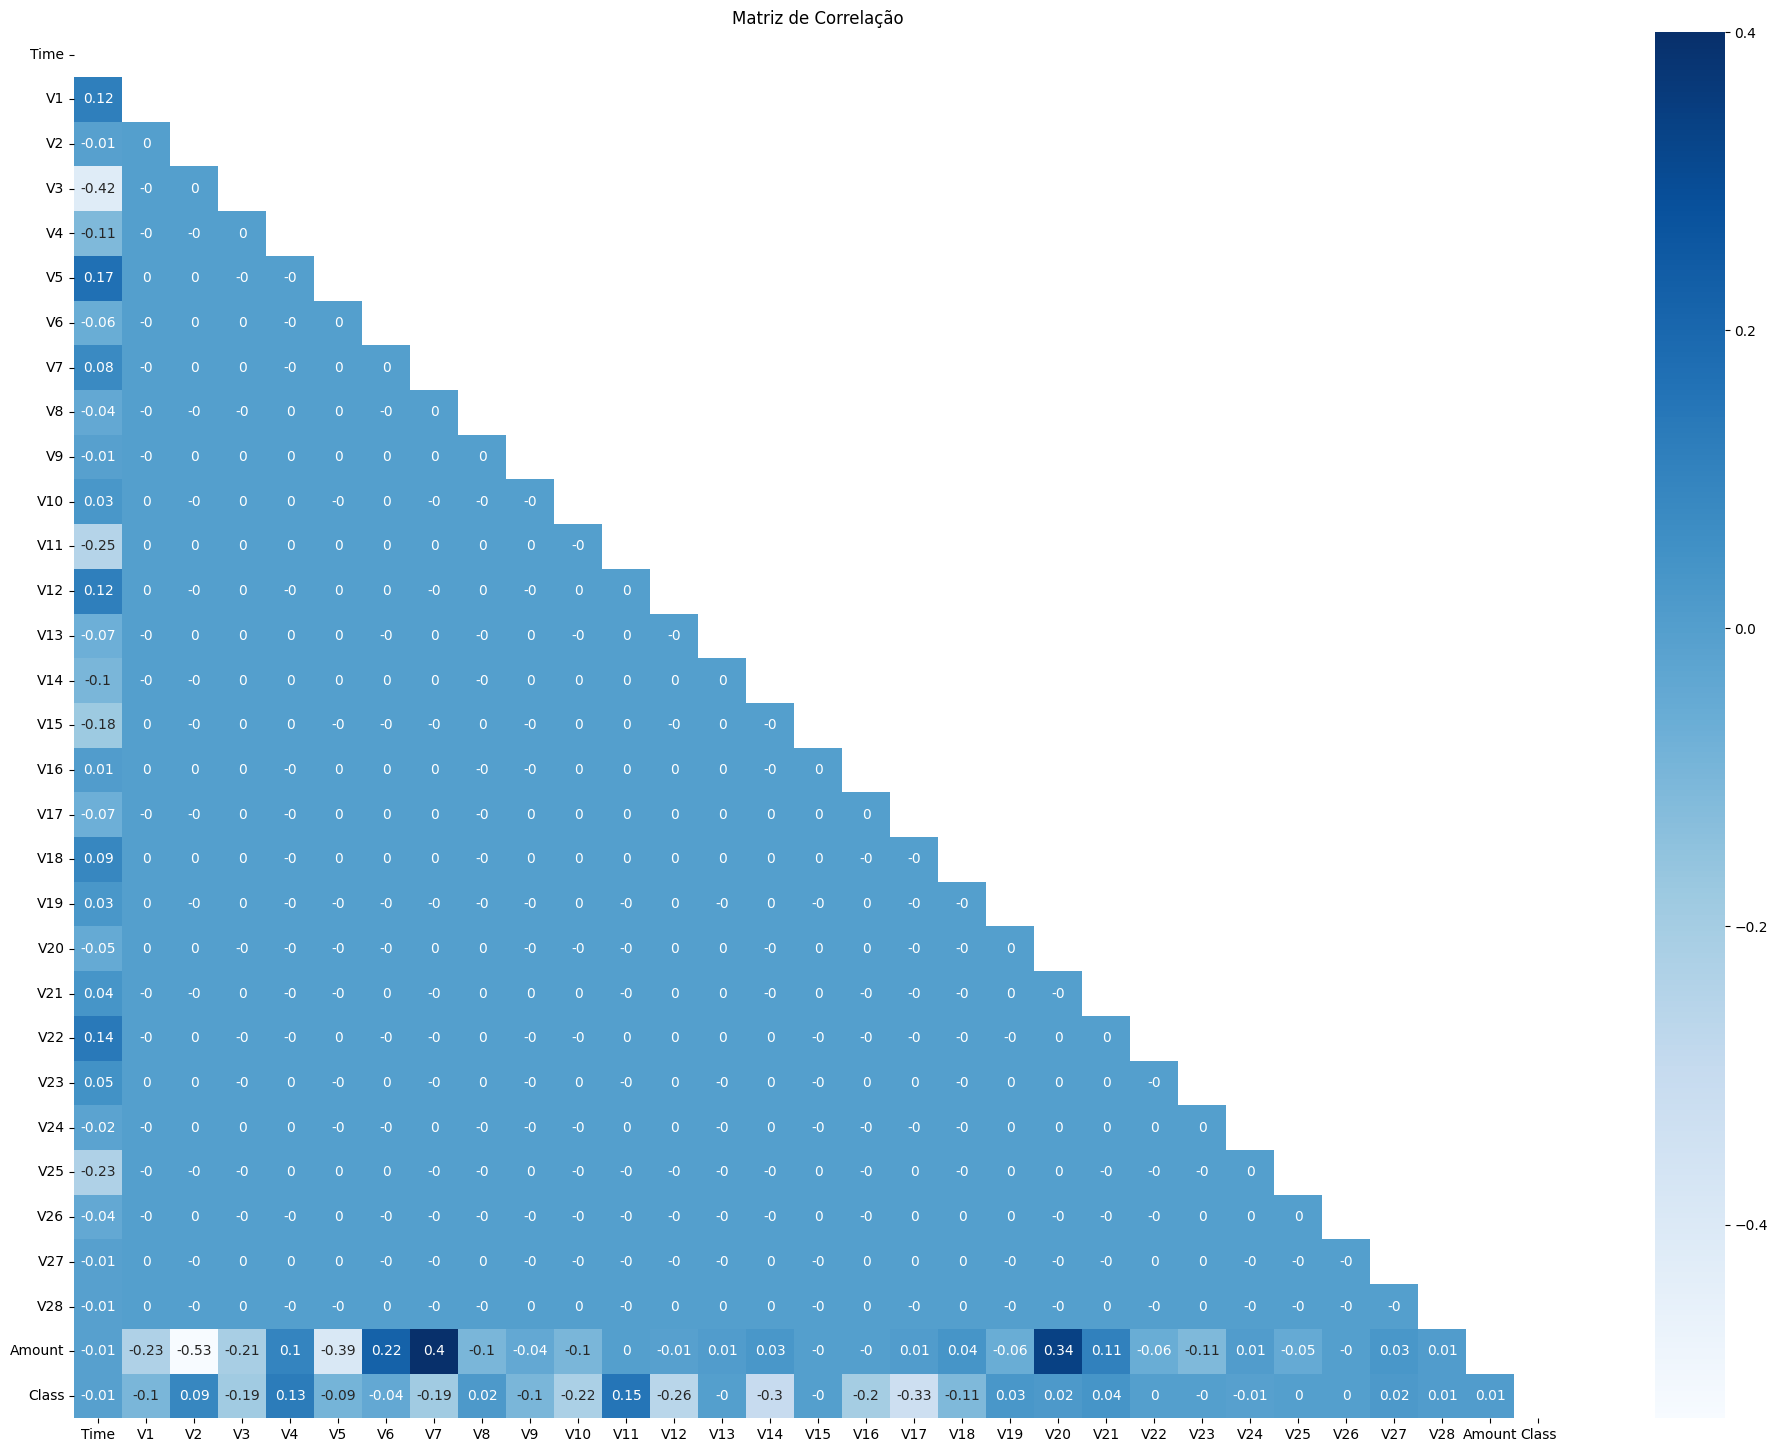

In [ ]:

# Calcular a matriz de correlação
correlation_matrix = df.corr().round(2)

# Criar uma máscara para ocultar a metade superior do heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Gerar o heatmap da matriz de correlação em tons de azul
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', mask=mask)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
#Separa os dados em X e y (X são os dados e y são as classes)
X = df.drop(columns=['Time','Class'])
y = df['Class']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


In [ ]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

## Função de Treinamento dos modelos

In [ ]:
## Função para treinamento dos modelos com K fold cross validation
def classificacao_relatorio(model, X, y, k, verbose=False):

  fpr = []
  tpr = []
  roc_auc = []
  original_class = []
  predicted_class = []
  predicted_proba = []

  skf = StratifiedKFold(k)

  i = 0

  # Treino e teste do modelo para cada k fold em todo dado de treinamento
  for train_index, test_index in skf.split(X,y):
    if verbose:
      print(f'-- Executando com o {i}-ésimo fold.')
    model.fit(X.iloc[train_index], y[train_index])
    y_pred_probability = model.predict_proba(X.iloc[test_index])

    # Gera a predição do modelo para gerar o relatório de classificação
    y_pred = model.predict(X.iloc[test_index])
    predicted_class.extend(y_pred)
    original_class.extend(y[test_index])

		#Calcula a área sobre a curva roc.
    temp_fpr, temp_tpr, _ = roc_curve(y[test_index], y_pred_probability[:,1])
    fpr.append(temp_fpr)
    tpr.append(temp_tpr)
    roc_auc.append(auc(temp_fpr,temp_tpr))
    i +=1

	#Plota o grafico da curva roc
  plot_roc_curve(model, fpr, tpr, roc_auc, k)

  #Imprime os resultados
  print ("== Matriz de Confusão ==")
  print(confusion_matrix(original_class, predicted_class))
  print( "\n")
  print ("== Relatório de classificação ==")
  print(classification_report(original_class, predicted_class))
  print( "\n")
  print ("== Valores da ROC AUC ==")
  print(roc_auc)
  print('\n>> TPR: ' + str(recall_score(original_class, predicted_class)))
  print('\n>> TNR: ' + str(recall_score(original_class, predicted_class, pos_label = 0)))
  print('\n>> FPR: ' + str(1-(recall_score(original_class, predicted_class, pos_label = 0))))
  print('\n>> FNR: ' + str(1-(recall_score(original_class, predicted_class))))
  print('\n>> F1-SCORE: ' + str(f1_score(original_class, predicted_class)))



def plot_roc_curve(model, fpr, tpr, roc_auc, k):
  # Configura o plot do grafico.
  plt.figure(figsize=(10, 10))
  plt.grid()
  plt.plot([0, 1], [0, 1], ls='--')
  plt.ylim([-0.01, 1.01])
  plt.xlim([-0.01, 1.01])
  plt.xlabel('Taxa de Falso Positivo', size=16)
  plt.ylabel('Taxa de Verdadeiro Positivo', size=16)

  linspace = np.linspace(0, 1, 100)

  # Calcula a media da curva roc.
  int_tpr = [np.interp(linspace, fpr[i], tpr[i]) for i in range(k)]
  mean_tpr = np.mean(int_tpr, axis=0)

  # Plota todas as curvas ROC para cada fol e a média da curva roc.
  for i in range(k):
    plt.plot(fpr[i], tpr[i], label=f'fold {i}, Area: {roc_auc[i]:.3f}')
  plt.plot(linspace, mean_tpr, label=f'Average Curve, Area: {auc(linspace, mean_tpr):.3f} (+/- {np.std(roc_auc)*2:.3f})')

  # Plota o grafico.
  plt.legend(prop={'size': 16})
  plt.show()

## Função de resampling do dataset
Utilizou-se a estratégia de dobrar a quantidade de dados da classe minoritária e reduzir a classe majoritária no mesmo numero

In [ ]:
def resampling_dataset(X, y, under_tech, over_tech, sampling_strategy=0.50, random_state=SEED, cluster_balance_threshold='auto', verbose=True):

    # UNDERSAMPLING
    if under_tech == 'rus':
        # Random Oversampling (RUS)
        rus = RandomUnderSampler(random_state=random_state, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = rus.fit_resample(X, y)
        if verbose: print('>> UNDERSAMPLING: Random Undersampling')
    elif under_tech == 'not': # Sem undersampling
        X_resampled = X.copy()
        y_resampled = y.copy()
        if verbose: print('>> SEM UNDERSAMPLING')
    else:
        if verbose: print('>> UNDERSAMPLING: ERRO!')

    # OVERSAMPLING
    if over_tech == 'k-sm':
        # K-Means SMOTE (K-SM)
        k_sm = KMeansSMOTE(random_state=random_state, cluster_balance_threshold=cluster_balance_threshold, n_jobs=-1)
        X_resampled, y_resampled = k_sm.fit_resample(X_resampled, y_resampled)
        if verbose: print('>> OVERSAMPLING: K-Means SMOTE')
    elif over_tech == 'not': # Sem oversampling
        if verbose: print('>> SEM OVERSAMPLING')
    else:
        if verbose: print('>> OVERSAMPLING: ERRO!')

    # Retorna X e y após o resamples dos dados
    return X_resampled, y_resampled

## Função de validação dos modelos

In [ ]:
## Função para validação dos modelos
def relatorio_validacao(model, X_train, y_train, X_test, y_test, verbose=False):

  fpr = []
  tpr = []
  roc_auc = []
  original_class = []
  predicted_class = []
  predicted_proba = []


  model.fit(X_train, y_train)
  y_pred_probability = model.predict_proba(X_test)

  # Gera o predict do modelo para gerar o classification report
  y_pred = model.predict(X_test)
  predicted_class.extend(y_pred)
  original_class.extend(y_test)

  # Compute micro-average ROC curve and ROC area.
  temp_fpr, temp_tpr, _ = roc_curve(y_test, y_pred_probability[:,1])
  fpr.append(temp_fpr)
  tpr.append(temp_tpr)
  roc_auc.append(auc(temp_fpr,temp_tpr))


	#Plota o grafico da curva roc
  plot_roc_curve_test(model, fpr, tpr, roc_auc)

  #Imprime os resultados
  print ("== Matriz de Confusão ==")
  print(confusion_matrix(original_class, predicted_class))
  print( "\n")
  print ("== Relatório de classificação ==")
  print(classification_report(original_class, predicted_class))
  print( "\n")
  print ("== Valores da ROC AUC ==")
  print(roc_auc)
  print('\n>> TPR: ' + str(recall_score(original_class, predicted_class)))
  print('\n>> TNR: ' + str(recall_score(original_class, predicted_class, pos_label = 0)))
  print('\n>> FPR: ' + str(1-(recall_score(original_class, predicted_class, pos_label = 0))))
  print('\n>> FNR: ' + str(1-(recall_score(original_class, predicted_class))))
  print('\n>> F1-SCORE: ' + str(f1_score(original_class, predicted_class)))

def plot_roc_curve_test(model, fpr, tpr, roc_auc):
  # Configura o plot do grafico.
  plt.figure(figsize=(10, 10))
  plt.grid()
  plt.plot([0, 1], [0, 1], ls='--')
  plt.ylim([-0.01, 1.01])
  plt.xlim([-0.01, 1.01])
  plt.xlabel('Taxa de Falso Positivo', size=16)
  plt.ylabel('Taxa de Verdadeiro Positivo', size=16)

  linspace = np.linspace(0, 1, 100)
  # Plota todas as curvas ROC para cada fol e a média da curva roc.

  for i in range(len(fpr)):
    # Plota as curvas ROC para cada fold e a média da curva ROC.
    plt.plot(fpr[i], tpr[i], label=f'Area da AUC: {roc_auc[i]:.3f}')



  # Plota o grafico.
  plt.legend(prop={'size': 16})
  plt.show()

# Modelagem e avalição dos resultados
Seleção de algoritmos: Para dados tabulares, modelos de classificadores baseados em árvores possuem um desempenho superior aos demais. Para este problema foram selecionados RF, GBT, XGBoost e Lighgbm (Modelos baseados em esemble e boosting). DT não foi um algoritmo utilizado pois possui uma tendencia a overfiting maior, uma vez que é uma única árvore de decisão predizendo, pode haver um sobreajuste do modelo.

Hiperparametros: Os modelos foram treinados sem qualquer ajuste nos hiperparametros.

Treinamento do modelo: Utilizou-se Kfold Stratificado, pois ele mantem a proporção das clases nos folds de treino e teste.

Para validação do modelo, treina ele com toda base, e executa a validação na base teste, desbalanceada, separada logo no inicio do processo (X_test e y_test)



**Avaliação dos resultados**

Para avaliação dos resultados utilizou-se:
- Matriz de confusão
- Precisão, recall e f1-score
- Área sob a curva ROC
- TPR: Taxa de verdadeiros positivos
- TNR: Taxa de verdadeiros negativos
- FPR: Taxa de falsos positivos
- FNR: Taxa de falsos negativos

Todas métricas para avaliação do resultado, são métricas que são utilizadas para o problema de classificação. Observa-se que a métrica de acurácia não foi selecionada, uma vez que com o desbalanceamento dos dados, ela não faz sentido. Uma vez que se o modelo "chutasse" sempre a classe majoritária ele apresentaria uma alta acurácia, mas não significaria que o modelo estaria com uma boa performance.

Não há indicios de overfitting, pois o desempenho dos modelos na etapa de treino e teste são condizentes. Caso houvesse overfitting o desempenho dos modelos na etapa de treinamento seriam excelentes, mas na etapa de teste seria pessimo, pois o modelo teria sobreajustado aos dados de treinamento.

Não há necessidade de criar um ensemble para o problema abordado pois isso aumentaria a complexidade da resolução e não haveria um ganho suficiente que justifique o uso de tal método. Em contra partida, foi utilizado o modelo de Random Forest que faz um ensemble de Decision Trees.


In [ ]:
#Fazendo o resampling do dataset
X_resampled, y_resampled = resampling_dataset(X_train, y_train, 'rus', 'k-sm', sampling_strategy=0.5 ,cluster_balance_threshold=0.01, verbose=True)

>> UNDERSAMPLING: Random Undersampling
>> OVERSAMPLING: K-Means SMOTE


In [ ]:
X_resampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.284213,-0.501464,-0.357034,-2.105217,-0.438960,-1.008206,0.096926,-0.295436,1.930483,-1.638090,...,0.063061,-0.202416,-0.393263,-0.207654,-0.405794,0.817223,-0.851350,0.059367,0.023643,57.010000
1,0.155404,-0.039331,-0.563432,-0.478156,0.985475,0.859321,0.577935,0.379662,0.023975,-0.401163,...,-0.134477,0.507181,1.405727,0.137711,-1.434481,-0.521119,-0.049328,0.049098,-0.030566,87.530000
2,1.135878,0.029953,0.323076,1.133289,-0.174560,0.004576,-0.148293,0.061964,0.283051,0.013872,...,-0.118918,0.195802,0.553511,-0.213152,-0.424880,0.640881,-0.125404,0.034163,0.021453,43.660000
3,1.992833,0.144782,-1.618801,1.410094,0.373586,-1.152419,0.642564,-0.402493,0.258189,0.260896,...,-0.289128,0.056648,0.332903,-0.013404,-0.017312,0.438219,-0.490139,-0.020661,-0.059648,27.000000
4,-0.385451,0.672831,0.987344,-0.948938,0.740487,-0.150095,1.075317,-0.279940,0.370106,-0.805037,...,-0.047132,0.008414,0.307288,-0.567814,0.657006,1.060964,0.270908,-0.389675,-0.300019,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,-3.073886,0.643695,-5.151331,1.842383,-0.839683,-2.802208,-2.071465,0.986880,-1.563625,-5.062613,...,0.269982,0.540031,-0.301894,-0.425115,-0.178911,-0.319688,0.549499,0.843214,-0.248739,244.750122
1579,-2.448367,-2.356937,-3.412768,3.198301,-3.413383,0.289337,-0.814394,-0.460800,-0.845664,-4.344551,...,2.465289,0.872978,-0.579285,-2.050235,0.065679,-0.005065,0.382076,0.548076,0.361182,1382.375933
1580,-8.605881,6.912179,-11.943206,4.204151,-6.974641,-3.254813,-7.656144,6.102553,-2.455328,-6.223591,...,0.815105,0.919854,-0.736188,0.137262,-0.055974,0.504673,-0.258716,1.167924,0.230004,99.990000
1581,-1.838714,-1.242375,-1.020891,2.008744,0.147356,0.427217,3.413236,-1.127964,-0.089844,1.425832,...,0.019131,-0.334926,0.415940,0.461135,0.824647,-0.253331,-0.464714,0.412101,-0.242450,634.462766


In [ ]:
#Dataset de treinamento após o resampling, ficou com praticamente a mesma quantidade de dados
y_resampled.value_counts()

Class
1    795
0    788
Name: count, dtype: int64

## Treinamento e teste do modelo de árvore de decisão

-- Executando com o 0-ésimo fold.
-- Executando com o 1-ésimo fold.
-- Executando com o 2-ésimo fold.
-- Executando com o 3-ésimo fold.
-- Executando com o 4-ésimo fold.


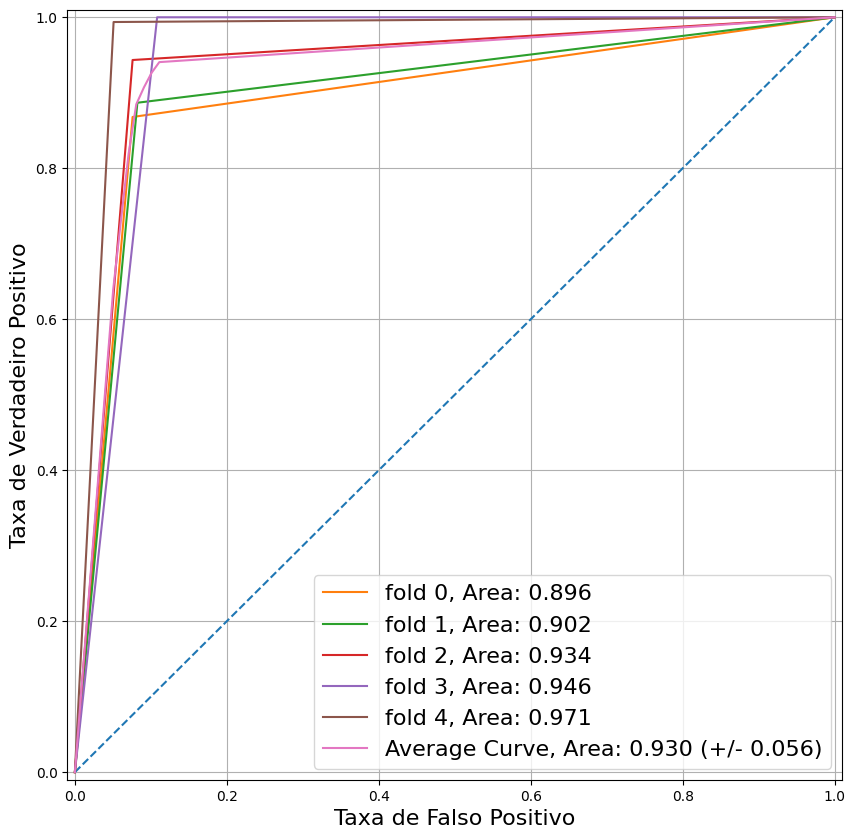

== Matriz de Confusão ==
[[726  62]
 [ 49 746]]


== Relatório de classificação ==
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       788
           1       0.92      0.94      0.93       795

    accuracy                           0.93      1583
   macro avg       0.93      0.93      0.93      1583
weighted avg       0.93      0.93      0.93      1583



== Valores da ROC AUC ==
[0.8959875806066396, 0.9022569859087652, 0.9337234296632434, 0.945859872611465, 0.9713776389055803]

>> TPR: 0.9383647798742139

>> TNR: 0.9213197969543148

>> FPR: 0.07868020304568524

>> FNR: 0.06163522012578615

>> F1-SCORE: 0.9307548346849657


In [ ]:
dt = DecisionTreeClassifier(random_state= SEED)
classificacao_relatorio(dt, X_resampled, y_resampled, k=5, verbose=True)

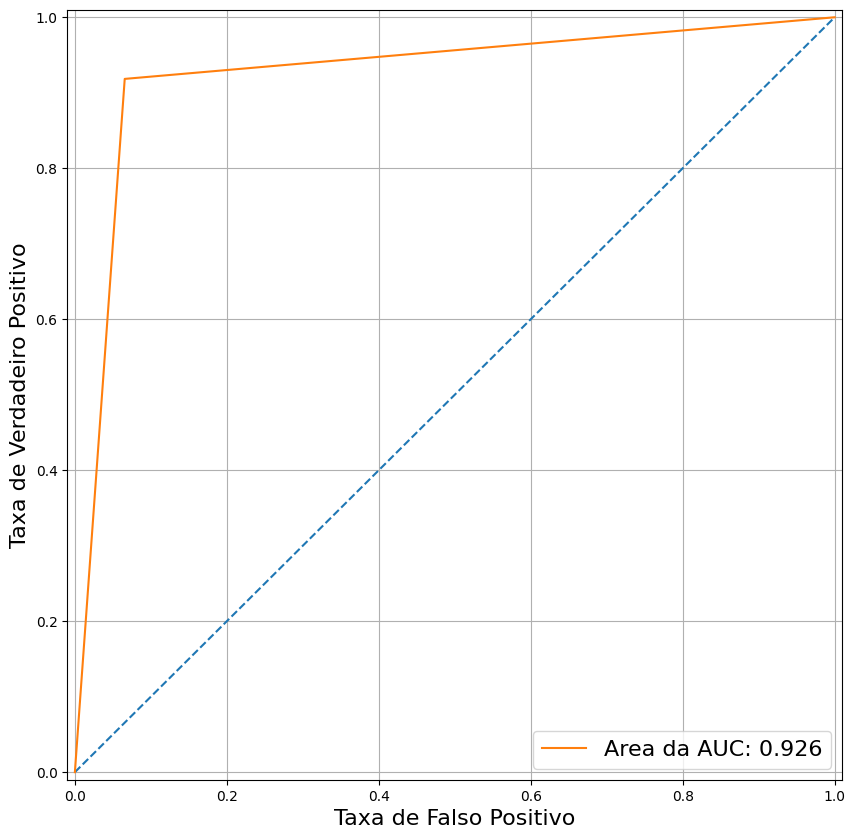

== Matriz de Confusão ==
[[53133  3731]
 [    8    90]]


== Relatório de classificação ==
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56864
           1       0.02      0.92      0.05        98

    accuracy                           0.93     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.93      0.96     56962



== Valores da ROC AUC ==
[0.9263773285059662]

>> TPR: 0.9183673469387755

>> TNR: 0.934387310073157

>> FPR: 0.06561268992684299

>> FNR: 0.08163265306122447

>> F1-SCORE: 0.045930084205154376


In [ ]:
relatorio_validacao(dt, X_resampled, y_resampled, X_test, y_test, verbose=True)

## Treinamento e teste do modelo de floresta aleatória

-- Executando com o 0-ésimo fold.
-- Executando com o 1-ésimo fold.
-- Executando com o 2-ésimo fold.
-- Executando com o 3-ésimo fold.
-- Executando com o 4-ésimo fold.


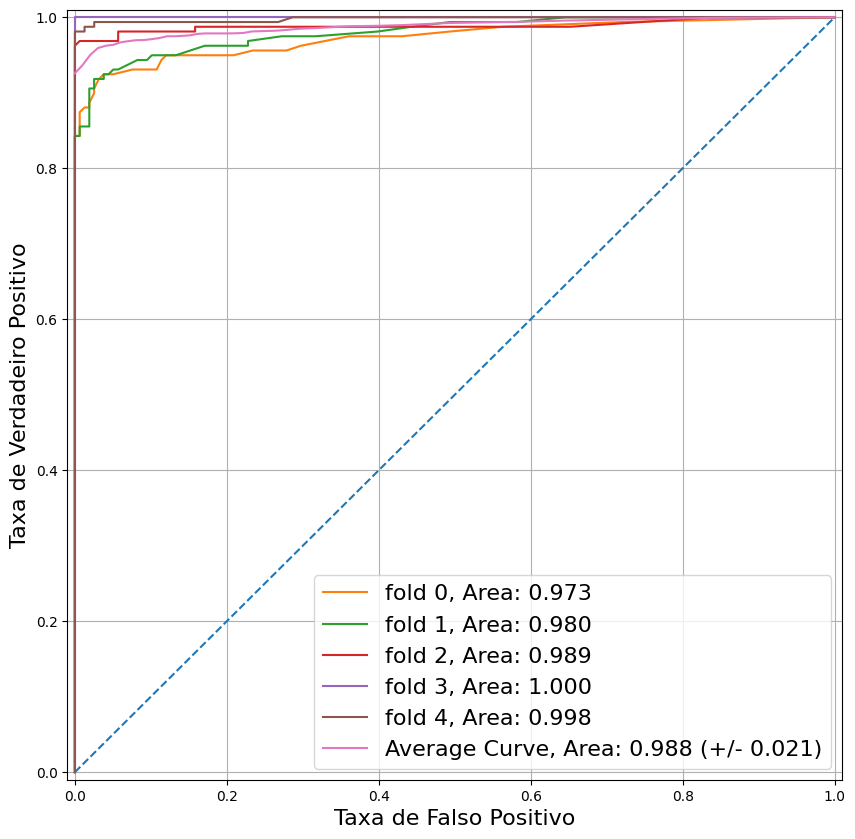

== Matriz de Confusão ==
[[779   9]
 [ 53 742]]


== Relatório de classificação ==
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       788
           1       0.99      0.93      0.96       795

    accuracy                           0.96      1583
   macro avg       0.96      0.96      0.96      1583
weighted avg       0.96      0.96      0.96      1583



== Valores da ROC AUC ==
[0.9730515086378473, 0.979997611655123, 0.9888742934479738, 1.0, 0.9980170652565797]

>> TPR: 0.9333333333333333

>> TNR: 0.9885786802030457

>> FPR: 0.011421319796954266

>> FNR: 0.06666666666666665

>> F1-SCORE: 0.9598965071151359


In [ ]:
rf = RandomForestClassifier(random_state= SEED)
classificacao_relatorio(rf, X_resampled, y_resampled, k=5, verbose=True)

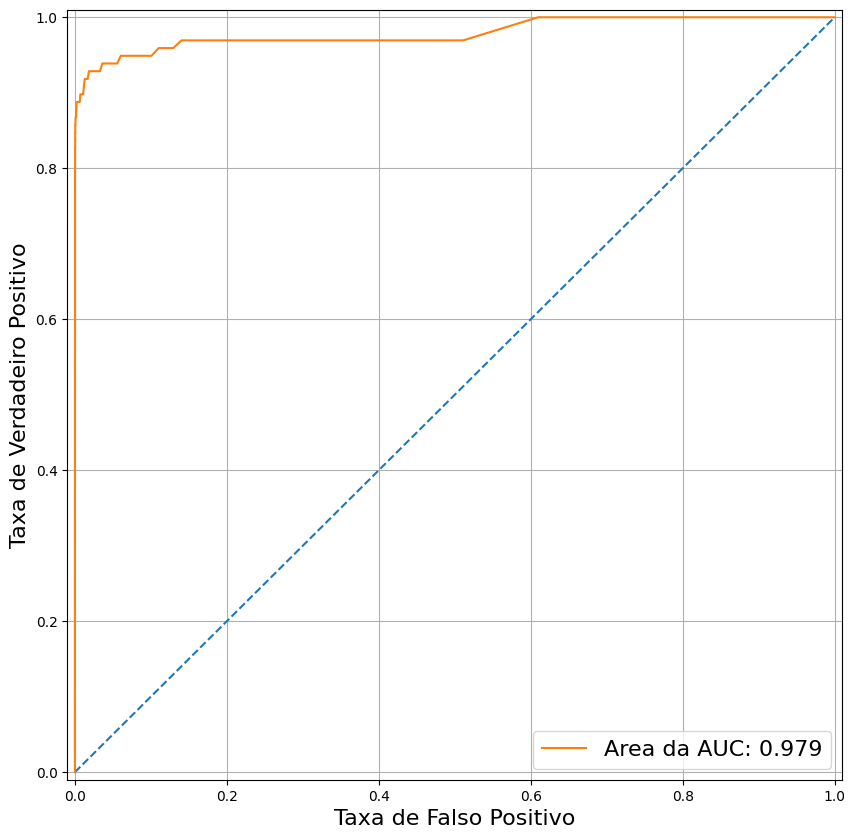

== Matriz de Confusão ==
[[56498   366]
 [   11    87]]


== Relatório de classificação ==
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.89      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.94      0.66     56962
weighted avg       1.00      0.99      1.00     56962



== Valores da ROC AUC ==
[0.9788015515716698]

>> TPR: 0.8877551020408163

>> TNR: 0.9935635903207654

>> FPR: 0.006436409679234645

>> FNR: 0.11224489795918369

>> F1-SCORE: 0.3157894736842105


In [ ]:
relatorio_validacao(rf, X_resampled, y_resampled, X_test, y_test, verbose=True)

## Treinamento e teste do modelo xgboost

-- Executando com o 0-ésimo fold.
-- Executando com o 1-ésimo fold.
-- Executando com o 2-ésimo fold.
-- Executando com o 3-ésimo fold.
-- Executando com o 4-ésimo fold.


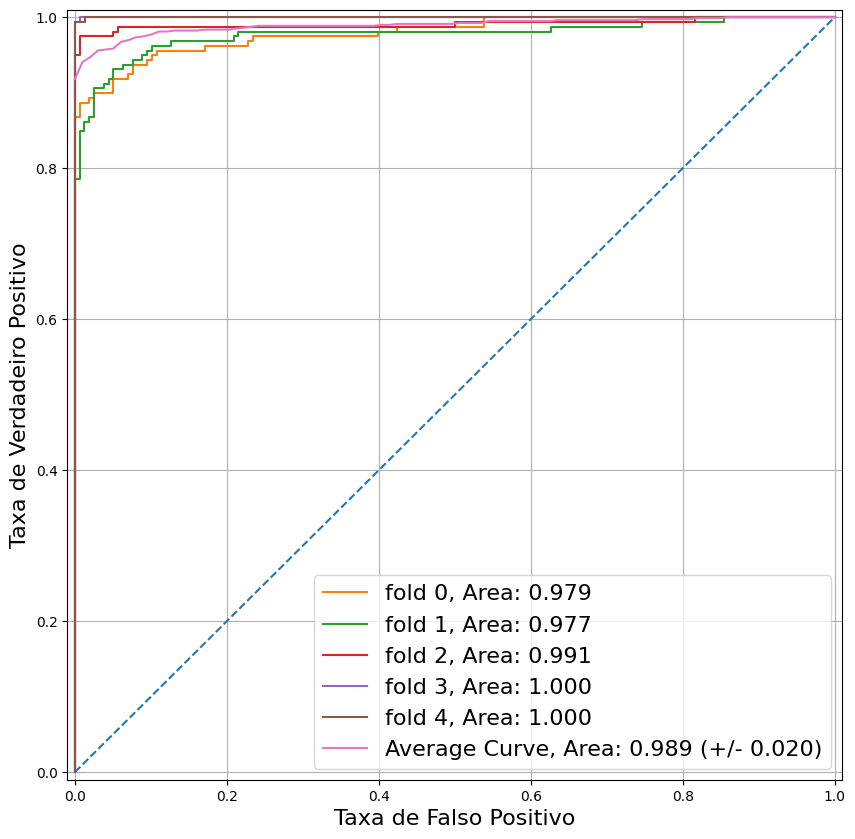

== Matriz de Confusão ==
[[775  13]
 [ 44 751]]


== Relatório de classificação ==
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       788
           1       0.98      0.94      0.96       795

    accuracy                           0.96      1583
   macro avg       0.96      0.96      0.96      1583
weighted avg       0.96      0.96      0.96      1583



== Valores da ROC AUC ==
[0.9794204283098479, 0.9770718891807977, 0.9908844837194491, 0.9999599407122541, 0.9999198814245083]

>> TPR: 0.9446540880503145

>> TNR: 0.983502538071066

>> FPR: 0.016497461928933976

>> FNR: 0.05534591194968552

>> F1-SCORE: 0.9634381013470172


In [ ]:
xgb = XGBClassifier(seed=SEED)
classificacao_relatorio(xgb, X_resampled, y_resampled, k=5, verbose=True)

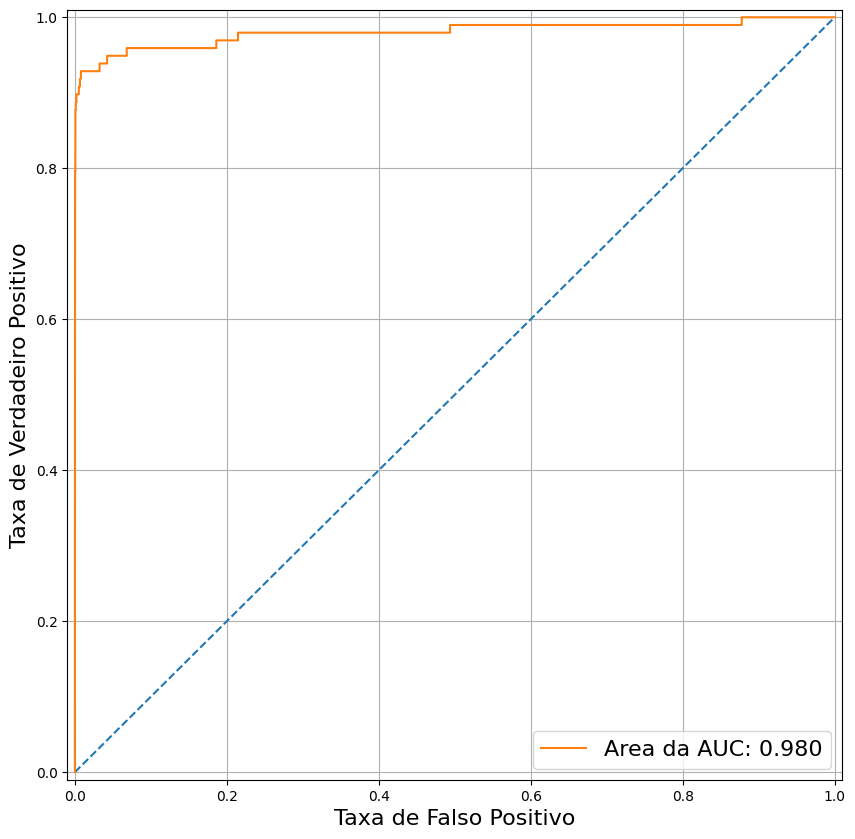

== Matriz de Confusão ==
[[56086   778]
 [    7    91]]


== Relatório de classificação ==
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.93      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.96      0.59     56962
weighted avg       1.00      0.99      0.99     56962



== Valores da ROC AUC ==
[0.98008926418063]

>> TPR: 0.9285714285714286

>> TNR: 0.9863182329769274

>> FPR: 0.013681767023072555

>> FNR: 0.0714285714285714

>> F1-SCORE: 0.18821096173733198


In [ ]:
relatorio_validacao(xgb, X_resampled, y_resampled, X_test, y_test, verbose=True)

In [ ]:
# Análises e conclusões


# Análises e conclusões

Análises e conclusões

- O pior modelo dentre os 3 testados foi o DT, isso já era esperado pois como ele é um modelo mais simples, seu desempenho tende a ser inferior ao Random forest (que é a união de diversas decision trees) e ao XGBoost.

- a AUC média dos modelos XGBoost e RF são semelhantes, o destaque aqui vai para a observação da matriz de confusão.

- Comparando os dados da etapa de treinamento, é possivel observar que RF possui uma precisão de 0,99 e recall de 0,93 para a classe 1 (que é o importante para este tipo de problema), enquanto que XGBoost, possuí 0,98 e 0,94 respectiviamente.

- Analisando apenas os dados de treinamentos eles são similares entre sim, no qual xgboos acertou mais transações fraudulentas (751), enquanto que RF acertou (742), entretanto ele xgboost gerou mais falsos positivos (13) se comparado a RF (9).

- Observando o comportamento do modelo no dataset de teste (dados reais sem balanceamento), o comportamento se manteve, com XGBoost tendo um recall maior, isto é, conseguindo predizer a maior quantidade das transações fraudulentas, entretanto lhe custando um pouco de precisão, pois gerou uma quantidade significativa maior de falsos positivos (778) contra (366) do RF.

- Vale destacar que mediante as métricas calculadas, é notável que o desempenho dos classificadores foi satisfatório, de modo que a estratégia de resampling adotada permitiu evitar possíveis vieses no momento do treinamento de cada modelo, de modo que, ao final, os resultados foram adequados e sem indícios de overfitting, uma vez que os desempenhos dos modelos para teste e validação foram adequados (o que certamente não aconteceria caso houvesse de fato overfitting).

- A partir desta analise qual modelo é melhor?


Depende de qual situação você terá no mundo real, é necessário colocar pesos sobre as escolhas. Você prefere um modelo que acerte mais suas predições, mas que deixe passar alguns casos de fraude ou prefere um que consiga alertar uma maior quantidade de fraudes, mesmo que isso lhe custe um pouco da precisão, o que resulta num aumento de falsos positivos??

Para o problema de fraudes, é importante considerar a cobertura que aquele modelo apresenta diante do problema abordado. É importante ele ser acertivo, mas pouco adianta ele ser acertivo e cobrir poucas transações de fraude. Dado o contexto o melhor modelo é o XGBoost, pois apesar de apresentar uma precisão inferior com as transações fraudulentas, mas ele conseguiu apresentar uma cobertura superior.